Τεχνικές Εξόρυξης Δεδομένων - 2η άσκηση

1115201600046 ΕΛΛΗΝΑ ΚΩΝΣΤΑΝΤΙΝΑ & 1115201600071 ΚΟΛΙΟΥ ΣΤΑΥΡΟΥΛΑ

In [1]:
#Import the libraries needed.

import os
import re
import nltk
import sklearn
import pandas as pd
from glob import glob
from pandas import DataFrame, read_csv
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import math  
from random import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import matplotlib.patches as mpatches

In [2]:
#We initialize the dataframes with the right columns.
df = pd.DataFrame(columns=['Id','Title','Content','Category'])
df1 = pd.DataFrame(columns=['Id','Title','Content','Category'])
df2 = pd.DataFrame(columns=['Id','Title','Content','Category'])
df3 = pd.DataFrame(columns=['Id','Title','Content','Category'])
df4 = pd.DataFrame(columns=['Id','Title','Content','Category'])

In [3]:
#We take from the files given the data we will need. We put in each dataframe a category with all the txt files.
new_list = []
i=0;
for root, dirs, files in os.walk("...\\fulltext\\data\\business"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text=f.readline().strip('\n')
                title=text;
                content=f.read()
                category='business'
                df.loc[i]=[i,title,content ,category]
                new_list.append(text)
                i=i+1  
for root, dirs, files in os.walk("...\\fulltext\\data\\entertainment"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text=f.readline().strip('\n')
                title=text;
                content=f.read()
                category='entertainment'
                df1.loc[i]=[i, title,content ,category]
                new_list.append(text)
                i=i+1    
df=df.append(df1)

In [4]:
for root, dirs, files in os.walk("...\\fulltext\\data\\politics"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text=f.readline().strip('\n')
                title=text;
                content=f.read()
                category='politics'
                df2.loc[i]=[i,title,content ,category]
                new_list.append(text)
                i=i+1    
df=df.append(df2)
for root, dirs, files in os.walk("...\\fulltext\\data\\sport"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text=f.readline().strip('\n')
                title=text;
                content=f.read()
                category='sport'
                df3.loc[i]=[i, title,content ,category]
                new_list.append(text)
                i=i+1         
df=df.append(df3)
for root, dirs, files in os.walk("...\\fulltext\\data\\tech"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text=f.readline().strip('\n')
                title=text;
                content=f.read()
                category='tech'
                df4.loc[i]=[i, title,content ,category]
                new_list.append(text)
                i=i+1   
                
df=df.append(df4)

df.to_csv("all_data.tsv",sep="\t")
df

,Id,Title,Content,Category
0,0,Ad sales boost Time Warner profit,\nQuarterly profits at US media giant TimeWarn...,business
1,1,Dollar gains on Greenspan speech,\nThe dollar has hit its highest level against...,business
2,2,Yukos unit buyer faces loan claim,\nThe owners of embattled Russian oil giant Yu...,business
3,3,High fuel prices hit BA's profits,\nBritish Airways has blamed high fuel prices ...,business
4,4,Pernod takeover talk lifts Domecq,\nShares in UK drinks and food firm Allied Dom...,business
...,...,...,...,...
2220,2220,BT program to beat dialler scams,\nBT is introducing two initiatives to help be...,tech
2221,2221,Spam e-mails tempt net shoppers,\nComputer users across the world continue to ...,tech
2222,2222,Be careful how you code,\nA new European directive could put software ...,tech
2223,2223,US cyber security chief resigns,\nThe man making sure US computer networks are...,tech


In [5]:
#We save to X and y the columns that we will need so we can process our data. Then we use the train_test_split.
#We also show the shape of our variables.
X = df[['Id','Title', 'Content']]
y = df[['Category']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=df.Category)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1780, 3)
(1780, 1)
(445, 3)
(445, 1)


In [6]:
#We make train_set and test_set tsv files.
X_train.to_csv('train_set.tsv', sep='\t')
X_test.to_csv('test_set.tsv', sep='\t')

#We also save the y_test to a tsv file, because we will need it afterwards.
y_test.to_csv('test_set_y.tsv', sep='\t')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1780, 3)
(1780, 1)
(445, 3)
(445, 1)


# Question1

In [7]:
#Here is a function for the wordcloud.
def showCloud(category,train):
    w1=train[train['Category']==category]
    
    text=w1['Content'].values
    all_words = []
    for i in range(len(text)):
        all_words.extend(word_tokenize(str(text[i])))
    
    word_tokens = word_tokenize(str(all_words)) 
    filtered_sentence = [w for w in word_tokens if not w in STOPWORDS] 

    final = [] 
    punctuations = '''!()-[]{};:'"\,<>./?@#^&*_~'''

    for w in filtered_sentence: 
        if w not in STOPWORDS:
            if w not in punctuations:
                final.append(w) 
    #And we show the wordcloud for text2.
    wordcloud = WordCloud(stopwords = STOPWORDS).generate(str(final))
    fig = plt.figure(figsize = (8, 8))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()   

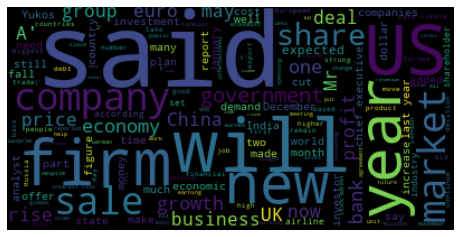

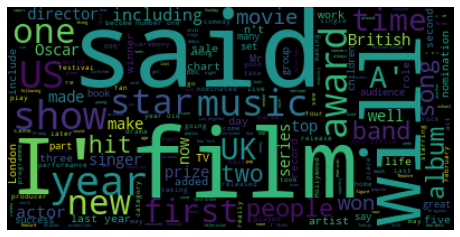

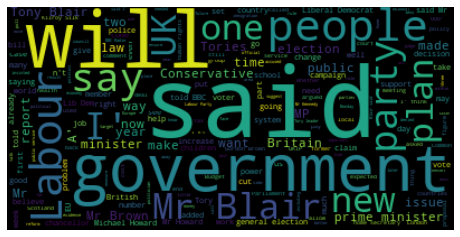

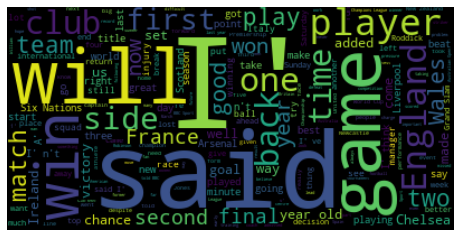

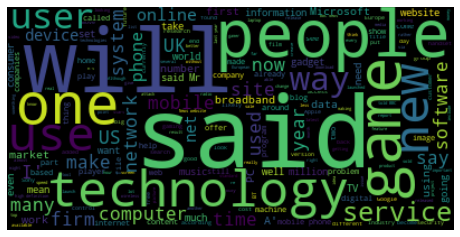

In [8]:
#And here we show the wordclouds that are requested.
train=X_train[['Id','Content','Title']].copy()
train['Category']=y_train['Category'].copy()

train.to_csv("train.tsv", sep="\t")
showCloud('business',train)
showCloud('entertainment',train)
showCloud('politics',train)
showCloud('sport',train)
showCloud('tech',train)

# Question2

# BoW

In [9]:
#We make the pre-processing to y_train_text and X_train_text.
X_train_text = X_train[['Content']]
y_train_text = y_train[['Category']]
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train_text.values[:, 0])

count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train_text.values[:, 0])

In [10]:
#We save only the content column that we will use.
#And we read the test_set_y and save it to y_test_set.
X_test_set = X_test[['Content']]

#We use transform to X_test and y_test_set and we now have the data we want to process.
X_test = count_vect.transform(X_test_set.values[:, 0])
y_test = label_encoder.transform(y_test.values[:, 0])

In [11]:
#Here is the function for calculating the roc auc score for multiclass format like ours.
#The function takes as parameters the true labels(y_test) and the target score from the classifier.
#We use LabelBinarizer and we fit and transform the result and we return the score usinh roc_auc_score function.
def roc_auc_score_multi(y_test, pred):
    label = LabelBinarizer()
    label.fit(y_test)
    y_test = label.transform(y_test)
    pred = label.transform(pred)
    return roc_auc_score(y_test, pred, multi_class='ovr')

In [12]:
#SVM

#We use GridSearchCV and we show the differences among the parameters.
#We choose the best and this is our classifier. We use fit to the classifier.
#We also calculate the prediction of X_test_counts that we will use afterwards.
param_grid = {'C': [1.0], 'gamma': ['auto'], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
g = grid.fit(X_train, y_train)
clf = g.best_estimator_
#pred = clf.predict(X_test)

#Here we calculate and we print the 10-fold Cross Validation of the metrics wanted for train
# res = clf.score(X_test, y_test)
# print('Test set score: ', res)
precision = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision_weighted')
print('Precision score: ', np.mean(precision), precision)
recall = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall_weighted')
print('Recall score: ', np.mean(recall), recall)
f1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_weighted')
print('F-Measure score: ', np.mean(f1), f1)
accuracy = cross_val_score(clf,X_train,y_train, cv=10, scoring='accuracy')
print('Accuracy score: ', np.mean(accuracy),accuracy)

#Here we calculate and we print the metrics for test
pred=cross_val_predict(clf, X_test,y_test, cv=10)
print('\n Test scores:')
res=clf.score(X_test, y_test)
print('Test set score: ', res)
precision = precision_score(y_test, pred,average='weighted')
print('Precision score: ', precision)
recall = recall_score(y_test, pred,average='weighted')
print('Recall score: ',recall)
f1 = f1_score(y_test, pred,average='weighted')
print('F-Measure score: ', f1)
accuracy = accuracy_score(y_test, pred)
print('Accuracy score: ', accuracy)

roc = roc_auc_score_multi(y_test, pred)
print('Roc auc score: ', roc)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] C=1.0, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=  10.3s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=   7.9s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=   7.9s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=   9.0s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=   9.2s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=   4.0s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=   3.9s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=   4.5s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


Precision score:  0.9577261762408005 [0.93962064 0.9444386  0.97268335 0.9627965  0.94527307 0.97240883
 0.93815317 0.95107682 0.96698374 0.98382703]
Recall score:  0.9567415730337077 [0.93820225 0.94382022 0.97191011 0.96067416 0.94382022 0.97191011
 0.93820225 0.9494382  0.96629213 0.98314607]
F-Measure score:  0.9566098095770847 [0.93825018 0.94340743 0.97196127 0.96092005 0.9428861  0.97184125
 0.93780082 0.94937442 0.96641509 0.98324149]
Accuracy score:  0.9567415730337077 [0.93820225 0.94382022 0.97191011 0.96067416 0.94382022 0.97191011
 0.93820225 0.9494382  0.96629213 0.98314607]

 Test scores:
Test set score:  0.9775280898876404
Precision score:  0.9019043867998497
Recall score:  0.9011235955056179
F-Measure score:  0.900973437770604
Accuracy score:  0.9011235955056179
Roc auc score:  0.9360727159154303


In [13]:
#Random Forest

#Same as before, we use fit to classifier Random Forest and we save the prediction. 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
#pred = clf.predict(X_test)

#Here we calculate and we print the 10-fold Cross Validation of the metrics wanted for train
# res = clf.score(X_test, y_test)
# print('Test set score: ', res)
precision = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision_weighted')
print('Precision score: ', np.mean(precision), precision)
recall = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall_weighted')
print('Recall score: ', np.mean(recall), recall)
f1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_weighted')
print('F-Measure score: ', np.mean(f1), f1)
accuracy = cross_val_score(clf,X_train,y_train, cv=10, scoring='accuracy')
print('Accuracy score: ', np.mean(accuracy),accuracy)

#Here we calculate and we print the metrics for test
pred=cross_val_predict(clf, X_test,y_test, cv=10)
print('\n Test scores:')
res=clf.score(X_test, y_test)
print('Test set score: ', res)
precision = precision_score(y_test, pred,average='weighted')
print('Precision score: ', precision)
recall = recall_score(y_test, pred,average='weighted')
print('Recall score: ',recall)
f1 = f1_score(y_test, pred,average='weighted')
print('F-Measure score: ', f1)
accuracy = accuracy_score(y_test, pred)
print('Accuracy score: ', accuracy)

roc = roc_auc_score_multi(y_test, pred)
print('Roc auc score: ', roc)

Precision score:  0.956746250539551 [0.93609953 0.94725543 0.95641586 0.96916416 0.96372741 0.96151123
 0.93832134 0.95269955 0.97341037 0.96885764]
Recall score:  0.948876404494382 [0.92134831 0.92134831 0.95505618 0.97752809 0.95505618 0.9494382
 0.9494382  0.96067416 0.93820225 0.96067416]
F-Measure score:  0.9492334559266281 [0.94368573 0.93759298 0.95491762 0.96637239 0.94336541 0.94339906
 0.93229415 0.95510836 0.95485052 0.96074834]
Accuracy score:  0.944943820224719 [0.91573034 0.91573034 0.9494382  0.96067416 0.96067416 0.94382022
 0.93258427 0.96067416 0.9494382  0.96067416]

 Test scores:
Test set score:  0.9595505617977528
Precision score:  0.9119323503938409
Recall score:  0.9078651685393259
F-Measure score:  0.9076291389349039
Accuracy score:  0.9078651685393259
Roc auc score:  0.9395689972697923


In [14]:
#Naive Bayes

#Same as before
clf =  MultinomialNB()
clf.fit(X_train, y_train)
#pred = clf.predict(X_test)

#Here we calculate and we print the 10-fold Cross Validation of the metrics wanted for train
# res = clf.score(X_test, y_test)
# print('Test set score: ', res)
precision = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision_weighted')
print('Precision score: ', np.mean(precision), precision)
recall = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall_weighted')
print('Recall score: ', np.mean(recall), recall)
f1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_weighted')
print('F-Measure score: ', np.mean(f1), f1)
accuracy = cross_val_score(clf,X_train,y_train, cv=10, scoring='accuracy')
print('Accuracy score: ', np.mean(accuracy),accuracy)

#Here we calculate and we print the metrics for test
pred=cross_val_predict(clf, X_test,y_test, cv=10)
print('\n Test scores:')
res=clf.score(X_test, y_test)
print('Test set score: ', res)
precision = precision_score(y_test, pred,average='weighted')
print('Precision score: ', precision)
recall = recall_score(y_test, pred,average='weighted')
print('Recall score: ',recall)
f1 = f1_score(y_test, pred,average='weighted')
print('F-Measure score: ', f1)
accuracy = accuracy_score(y_test, pred)
print('Accuracy score: ', accuracy)

roc = roc_auc_score_multi(y_test, pred)
print('Roc auc score: ', roc)

Precision score:  0.9747046831108188 [0.9623527  0.96143994 0.97399679 0.98397224 0.96281434 0.97818903
 0.96697432 0.97910283 0.97820465 1.        ]
Recall score:  0.9735955056179775 [0.96067416 0.96067416 0.97191011 0.98314607 0.96067416 0.97752809
 0.96629213 0.97752809 0.97752809 1.        ]
F-Measure score:  0.9736119232077651 [0.96066638 0.96059322 0.97183042 0.98313629 0.96093722 0.97755788
 0.96640316 0.97757163 0.97742302 1.        ]
Accuracy score:  0.9735955056179775 [0.96067416 0.96067416 0.97191011 0.98314607 0.96067416 0.97752809
 0.96629213 0.97752809 0.97752809 1.        ]

 Test scores:
Test set score:  0.9842696629213483
Precision score:  0.9395608017336328
Recall score:  0.9303370786516854
F-Measure score:  0.9296426574969396
Accuracy score:  0.9303370786516854
Roc auc score:  0.9544973389719384


In [15]:
#KNN
import scipy.spatial
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score

class KNNClassifier:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        return scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(self.X_train)):
                dist = self.distance(self.X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(self.y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)
    
    def classify(self, inputs):
        return sign(self.predict(inputs))

    def get_params(self, deep=True):
        return {"k": self.k}

clf=KNNClassifier(5)
clf.fit(X_train.toarray(),y_train)
#pred=clf.predict(X_test.toarray())
precision = cross_val_score(clf, X_train.toarray(), y_train, cv=10, scoring='precision_weighted')
print('Precision score: ', np.mean(precision), precision)
recall = cross_val_score(clf, X_train.toarray(), y_train, cv=10, scoring='recall_weighted')
print('Recall score: ', np.mean(recall), recall)
f1 = cross_val_score(clf, X_train.toarray(), y_train, cv=10, scoring='f1_weighted')
print('F-Measure score: ', np.mean(f1), f1)
accuracy = cross_val_score(clf,X_train.toarray(),y_train, cv=10, scoring='accuracy')
print('Accuracy score: ', np.mean(accuracy),accuracy)

#Here we calculate and we print the metrics for test
pred=cross_val_predict(clf, X_test.toarray(),y_test, cv=10)
print('\n Test scores:')
res=clf.score(X_test.toarray(), y_test)
print('Test set score: ', res)
precision = precision_score(y_test, pred,average='weighted')
print('Precision score: ', precision)
recall = recall_score(y_test, pred,average='weighted')
print('Recall score: ',recall)
f1 = f1_score(y_test, pred,average='weighted')
print('F-Measure score: ', f1)
accuracy = accuracy_score(y_test, pred)
print('Accuracy score: ', accuracy)

roc = roc_auc_score_multi(y_test, pred)
print('Roc auc score: ', roc)

Precision score:  0.7731462772582909 [0.81367876 0.75340571 0.77644708 0.76727344 0.77787531 0.76804603
 0.77594216 0.75725293 0.76394176 0.7775996 ]
Recall score:  0.749438202247191 [0.80337079 0.71348315 0.75280899 0.74719101 0.74157303 0.74719101
 0.76404494 0.73033708 0.74719101 0.74719101]
F-Measure score:  0.7454836283260828 [0.8018059  0.71454086 0.74449019 0.74467527 0.73998464 0.74229078
 0.76130635 0.73075595 0.73324932 0.74173703]
Accuracy score:  0.749438202247191 [0.80337079 0.71348315 0.75280899 0.74719101 0.74157303 0.74719101
 0.76404494 0.73033708 0.74719101 0.74719101]

 Test scores:
Test set score:  0.7595505617977528
Precision score:  0.6589250609447845
Recall score:  0.6179775280898876
F-Measure score:  0.6145909176532893
Accuracy score:  0.6179775280898876
Roc auc score:  0.7555662220881093


# TF-IDF 

In [16]:
#We change the vectorizer to TdidfVectorizer and we will calculate the same things as before with this one.
tf_vect = TfidfVectorizer()
X_trainT = tf_vect.fit_transform(X_train_text.values[:, 0])
X_testT=tf_vect.transform(X_test_set.values[:,0])

In [17]:
#SVM

#Same as BoW example of SVM.
param_grid = {'C': [1.0], 'gamma': ['auto'], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
g = grid.fit(X_trainT, y_train)
clf = g.best_estimator_
#pred = clf.predict(X_testT)

#Here we calculate and we print the 10-fold Cross Validation of the metrics wanted for train
# res = clf.score(X_test, y_test)
# print('Test set score: ', res)
precision = cross_val_score(clf, X_trainT, y_train, cv=10, scoring='precision_weighted')
print('Precision score: ', np.mean(precision), precision)
recall = cross_val_score(clf, X_trainT, y_train, cv=10, scoring='recall_weighted')
print('Recall score: ', np.mean(recall), recall)
f1 = cross_val_score(clf, X_trainT, y_train, cv=10, scoring='f1_weighted')
print('F-Measure score: ', np.mean(f1), f1)
accuracy = cross_val_score(clf,X_trainT,y_train, cv=10, scoring='accuracy')
print('Accuracy score: ', np.mean(accuracy),accuracy)

#Here we calculate and we print the metrics for test
pred=cross_val_predict(clf, X_testT,y_test, cv=10)
print('\n Test scores:')
res=clf.score(X_testT, y_test)
print('Test set score: ', res)
precision = precision_score(y_test, pred,average='weighted')
print('Precision score: ', precision)
recall = recall_score(y_test, pred,average='weighted')
print('Recall score: ',recall)
f1 = f1_score(y_test, pred,average='weighted')
print('F-Measure score: ', f1)
accuracy = accuracy_score(y_test, pred)
print('Accuracy score: ', accuracy)

roc = roc_auc_score_multi(y_test, pred)
print('Roc auc score: ', roc)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] C=1.0, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=  13.5s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s


[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=  13.6s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=  13.1s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=  11.0s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=  12.0s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=   9.0s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=  10.7s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=  10.2s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished


Precision score:  0.9758610066974022 [0.96164196 0.96660195 0.97837905 0.98893429 0.96213965 0.98944501
 0.96061571 0.98318118 0.98382703 0.98384423]
Recall score:  0.9752808988764043 [0.96067416 0.96629213 0.97752809 0.98876404 0.96067416 0.98876404
 0.96067416 0.98314607 0.98314607 0.98314607]
F-Measure score:  0.9752531068265909 [0.96076173 0.96620025 0.97771849 0.98876121 0.96045215 0.98886171
 0.96040009 0.98308662 0.98318118 0.98310763]
Accuracy score:  0.9752808988764043 [0.96067416 0.96629213 0.97752809 0.98876404 0.96067416 0.98876404
 0.96067416 0.98314607 0.98314607 0.98314607]

 Test scores:
Test set score:  0.9842696629213483
Precision score:  0.9697791630318487
Recall score:  0.9685393258426966
F-Measure score:  0.9686760204889738
Accuracy score:  0.9685393258426966
Roc auc score:  0.9795054844769385


In [18]:
#Random Forest

#Same as before.
clf = RandomForestClassifier()
clf.fit(X_trainT, y_train)
#pred = clf.predict(X_testT)

#Here we calculate and we print the 10-fold Cross Validation of the metrics wanted for train
# res = clf.score(X_test, y_test)
# print('Test set score: ', res)
precision = cross_val_score(clf, X_trainT, y_train, cv=10, scoring='precision_weighted')
print('Precision score: ', np.mean(precision), precision)
recall = cross_val_score(clf, X_trainT, y_train, cv=10, scoring='recall_weighted')
print('Recall score: ', np.mean(recall), recall)
f1 = cross_val_score(clf, X_trainT, y_train, cv=10, scoring='f1_weighted')
print('F-Measure score: ', np.mean(f1), f1)
accuracy = cross_val_score(clf,X_train,y_train, cv=10, scoring='accuracy')
print('Accuracy score: ', np.mean(accuracy),accuracy)

#Here we calculate and we print the metrics for test
pred=cross_val_predict(clf, X_testT,y_test, cv=10)
print('\n Test scores:')
res=clf.score(X_testT, y_test)
print('Test set score: ', res)
precision = precision_score(y_test, pred,average='weighted')
print('Precision score: ', precision)
recall = recall_score(y_test, pred,average='weighted')
print('Recall score: ',recall)
f1 = f1_score(y_test, pred,average='weighted')
print('F-Measure score: ', f1)
accuracy = accuracy_score(y_test, pred)
print('Accuracy score: ', accuracy)

roc = roc_auc_score_multi(y_test, pred)
print('Roc auc score: ', roc)

Precision score:  0.9557297834927814 [0.92982757 0.92621965 0.97251812 0.96828964 0.95193224 0.96770879
 0.96675637 0.96166266 0.93829603 0.97408677]
Recall score:  0.95 [0.93258427 0.92696629 0.96067416 0.96629213 0.93258427 0.96067416
 0.97191011 0.92696629 0.9494382  0.97191011]
F-Measure score:  0.9498805815374765 [0.93826418 0.93802798 0.96086695 0.96059712 0.94369849 0.94918808
 0.95482698 0.95493258 0.93228875 0.96611472]
Accuracy score:  0.9499999999999998 [0.92696629 0.94382022 0.94382022 0.97191011 0.94382022 0.9494382
 0.9494382  0.9494382  0.9494382  0.97191011]

 Test scores:
Test set score:  0.9617977528089887
Precision score:  0.8985955685323676
Recall score:  0.8921348314606742
F-Measure score:  0.8922299208346367
Accuracy score:  0.8921348314606742
Roc auc score:  0.9289947387863148


In [19]:
#Naive Bayes

#Same as before
clf =  MultinomialNB()
clf.fit(X_trainT, y_train)
#pred = clf.predict(X_testT)

#Here we calculate and we print the 10-fold Cross Validation of the metrics wanted for train
# res = clf.score(X_test, y_test)
# print('Test set score: ', res)
precision = cross_val_score(clf, X_trainT, y_train, cv=10, scoring='precision_weighted')
print('Precision score: ', np.mean(precision), precision)
recall = cross_val_score(clf, X_trainT, y_train, cv=10, scoring='recall_weighted')
print('Recall score: ', np.mean(recall), recall)
f1 = cross_val_score(clf, X_trainT, y_train, cv=10, scoring='f1_weighted')
print('F-Measure score: ', np.mean(f1), f1)
accuracy = cross_val_score(clf,X_trainT,y_train, cv=10, scoring='accuracy')
print('Accuracy score: ', np.mean(accuracy),accuracy)

#Here we calculate and we print the metrics for test
pred=cross_val_predict(clf, X_testT,y_test, cv=10)
print('\n Test scores:')
res=clf.score(X_testT, y_test)
print('Test set score: ', res)
precision = precision_score(y_test, pred,average='weighted')
print('Precision score: ', precision)
recall = recall_score(y_test, pred,average='weighted')
print('Recall score: ',recall)
f1 = f1_score(y_test, pred,average='weighted')
print('F-Measure score: ', f1)
accuracy = accuracy_score(y_test, pred)
print('Accuracy score: ', accuracy)

roc = roc_auc_score_multi(y_test, pred)
print('Roc auc score: ', roc)

Precision score:  0.944950385714575 [0.9367168  0.92573486 0.93622371 0.96723061 0.92578538 0.93829408
 0.9212482  0.95834866 0.95562635 0.9842952 ]
Recall score:  0.9415730337078652 [0.93258427 0.92134831 0.93258427 0.96629213 0.92134831 0.93258427
 0.91573034 0.95505618 0.95505618 0.98314607]
F-Measure score:  0.9405962018055913 [0.93139716 0.91947021 0.9320104  0.9662206  0.92001878 0.93135263
 0.91331488 0.95458918 0.95437196 0.98321622]
Accuracy score:  0.9415730337078652 [0.93258427 0.92134831 0.93258427 0.96629213 0.92134831 0.93258427
 0.91573034 0.95505618 0.95505618 0.98314607]

 Test scores:
Test set score:  0.9685393258426966
Precision score:  0.8849600465983459
Recall score:  0.8651685393258427
F-Measure score:  0.8595634499573258
Accuracy score:  0.8651685393258427
Roc auc score:  0.9078162918625174


In [20]:
#KNN
clf=KNNClassifier(5)
clf.fit(X_trainT.toarray(),y_train)
#pred=clf.predict(X_test.toarray())
precision = cross_val_score(clf, X_trainT.toarray(), y_train, cv=10, scoring='precision_weighted')
print('Precision score: ', np.mean(precision), precision)
recall = cross_val_score(clf, X_trainT.toarray(), y_train, cv=10, scoring='recall_weighted')
print('Recall score: ', np.mean(recall), recall)
f1 = cross_val_score(clf, X_trainT.toarray(), y_train, cv=10, scoring='f1_weighted')
print('F-Measure score: ', np.mean(f1), f1)
accuracy = cross_val_score(clf,X_trainT.toarray(),y_train, cv=10, scoring='accuracy')
print('Accuracy score: ', np.mean(accuracy),accuracy)

#Here we calculate and we print the metrics for test
pred=cross_val_predict(clf, X_testT.toarray(),y_test, cv=10)
print('\n Test scores:')
res=clf.score(X_testT.toarray(), y_test)
print('Test set score: ', res)
precision = precision_score(y_test, pred,average='weighted')
print('Precision score: ', precision)σ
recall = recall_score(y_test, pred,average='weighted')
print('Recall score: ',recall)
f1 = f1_score(y_test, pred,average='weighted')
print('F-Measure score: ', f1)
accuracy = accuracy_score(y_test, pred)
print('Accuracy score: ', accuracy)

roc = roc_auc_score_multi(y_test, pred)
print('Roc auc score: ', roc)

Precision score:  0.9198976870087436 [0.92945991 0.89390261 0.93795671 0.94292891 0.92484102 0.90444272
 0.91000484 0.9397481  0.90415503 0.91153702]
Recall score:  0.901123595505618 [0.91573034 0.87078652 0.92696629 0.93820225 0.92134831 0.87078652
 0.88202247 0.90449438 0.87640449 0.90449438]
F-Measure score:  0.9027751741888602 [0.91524532 0.87289231 0.92655246 0.93845056 0.92097312 0.87282081
 0.88660575 0.91110942 0.87996569 0.90313631]
Accuracy score:  0.901123595505618 [0.91573034 0.87078652 0.92696629 0.93820225 0.92134831 0.87078652
 0.88202247 0.90449438 0.87640449 0.90449438]

 Test scores:
Test set score:  0.9280898876404494
Precision score:  0.9151735546945247
Recall score:  0.9123595505617977
F-Measure score:  0.9121448236922656
Accuracy score:  0.9123595505617977
Roc auc score:  0.9423024221588596


# Question 3

In [21]:
#Using MaxAbsScaler at Naive Bayes algorithm we scale the features by their maximum absolute values
#so we must have a better score.
#We use Pipeline to pass the arguments and as we see the score is better than before.
steps = [('scaler', MaxAbsScaler()), ('bayes', MultinomialNB())]
pipeline = Pipeline(steps)
pipeline.fit(X_trainT, y_train)

precision = cross_val_score(pipeline, X_trainT, y_train, cv=10, scoring='precision_weighted')
print('Precision score: ', np.mean(precision), precision)
recall = cross_val_score(pipeline, X_trainT, y_train, cv=10, scoring='recall_weighted')
print('Recall score: ', np.mean(recall), recall)
f1 = cross_val_score(pipeline, X_trainT, y_train, cv=10, scoring='f1_weighted')
print('F-Measure score: ', np.mean(f1), f1)
accuracy = cross_val_score(pipeline,X_trainT,y_train, cv=10, scoring='accuracy')
print('Accuracy score: ', np.mean(accuracy),accuracy)

#Here we calculate and we print the metrics for test
pred=cross_val_predict(pipeline, X_testT,y_test, cv=10)
print('\n Test scores:')
res=pipeline.score(X_testT, y_test)
print('Test set score: ', res)
precision = precision_score(y_test, pred,average='weighted')
print('Precision score: ', precision)
recall = recall_score(y_test, pred,average='weighted')
print('Recall score: ',recall)
f1 = f1_score(y_test, pred,average='weighted')
print('F-Measure score: ', f1)
accuracy = accuracy_score(y_test, pred)
print('Accuracy score: ', accuracy)

roc = roc_auc_score_multi(y_test, pred)
print('Roc auc score: ', roc)

Precision score:  0.963956489968426 [0.95173977 0.94392458 0.96278196 0.98366867 0.95208546 0.97818903
 0.94507327 0.97015841 0.96264465 0.98929909]
Recall score:  0.9617977528089888 [0.9494382  0.93820225 0.96067416 0.98314607 0.9494382  0.97752809
 0.94382022 0.96629213 0.96067416 0.98876404]
F-Measure score:  0.9619277159241137 [0.94942113 0.93901483 0.96067164 0.98309256 0.94956114 0.97755788
 0.94391042 0.96656096 0.96067617 0.98881043]
Accuracy score:  0.9617977528089888 [0.9494382  0.93820225 0.96067416 0.98314607 0.9494382  0.97752809
 0.94382022 0.96629213 0.96067416 0.98876404]

 Test scores:
Test set score:  0.9707865168539326
Precision score:  0.9310290551998759
Recall score:  0.9280898876404494
F-Measure score:  0.9273271875905253
Accuracy score:  0.9280898876404494
Roc auc score:  0.9521480560976808


# Question 4

# BoW

In [22]:
#We save to dataset the X_train data on an array. We use KMeans with 5 clusters as requested. We fit the dataset.
#We use predict to dataset so that we have the the predictions of the result.
def distance(X, Y = None):
    return cosine_similarity(X, Y)

dataset = X_train.toarray()
kmeans = KMeans(n_clusters=5)
kmeans.euclidean_distances = distance
kmeans.fit(dataset)
y_kmeans = kmeans.predict(dataset)

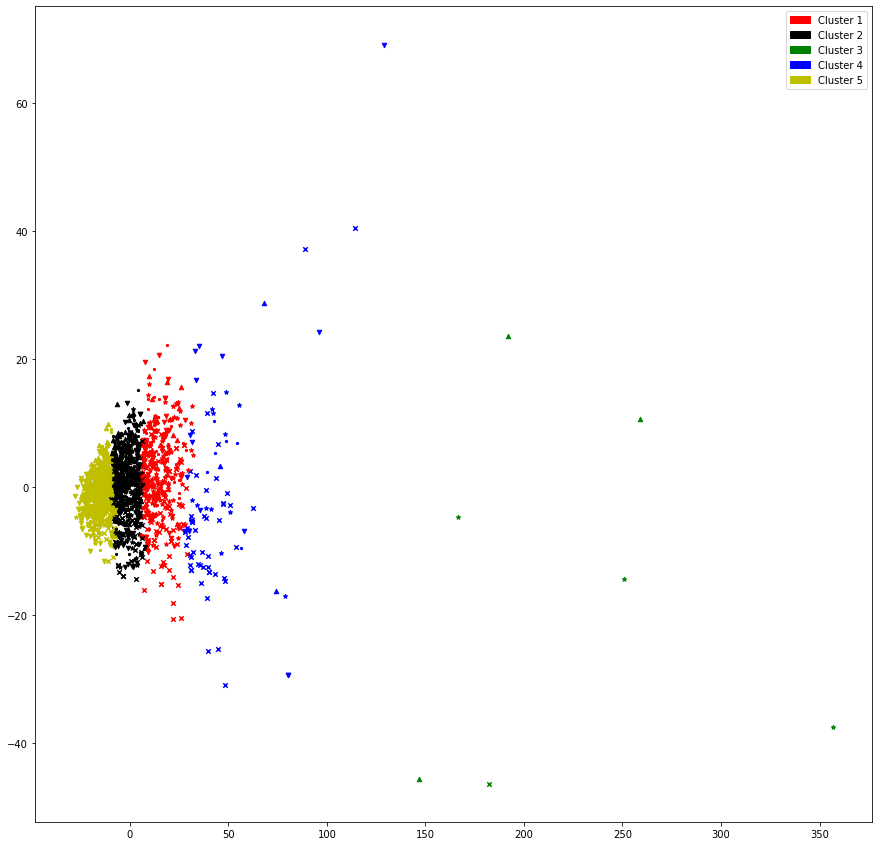

In [23]:
#We use PCA with 2 components. We use fit_transform to the dataset. We save in x and y the results of res.
pca = PCA(n_components=2)
res = pca.fit_transform(dataset)
x = res[:, 0]
y = res[:, 1]

#We save to a dictionary the colors that each cluster will have and in another dictionary the markers that will
#show the category of the elements.
colors = {0:'r', 1:'k', 2:'g', 3:'b', 4:'y'}
markers = {0:'.', 1:'^', 2:'*', 3:'v', 4:'x'}

#We represent the diagram with the colors and the markers.
#The clusters are shown in colors and the categories are shown in markers.
plt.figure(figsize=(15,15))
for i in range(y_train.shape[0]):
    plt.scatter(x[i], y[i], c=colors[y_kmeans[i]], marker=markers[y_train[i]], s=20)    

#With Patch we explain which color correspond to each cluster.
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
leg = [mpatches.Patch(color=colors[i], label=clusters[i]) for i in range(5)]
plt.legend(handles=leg)

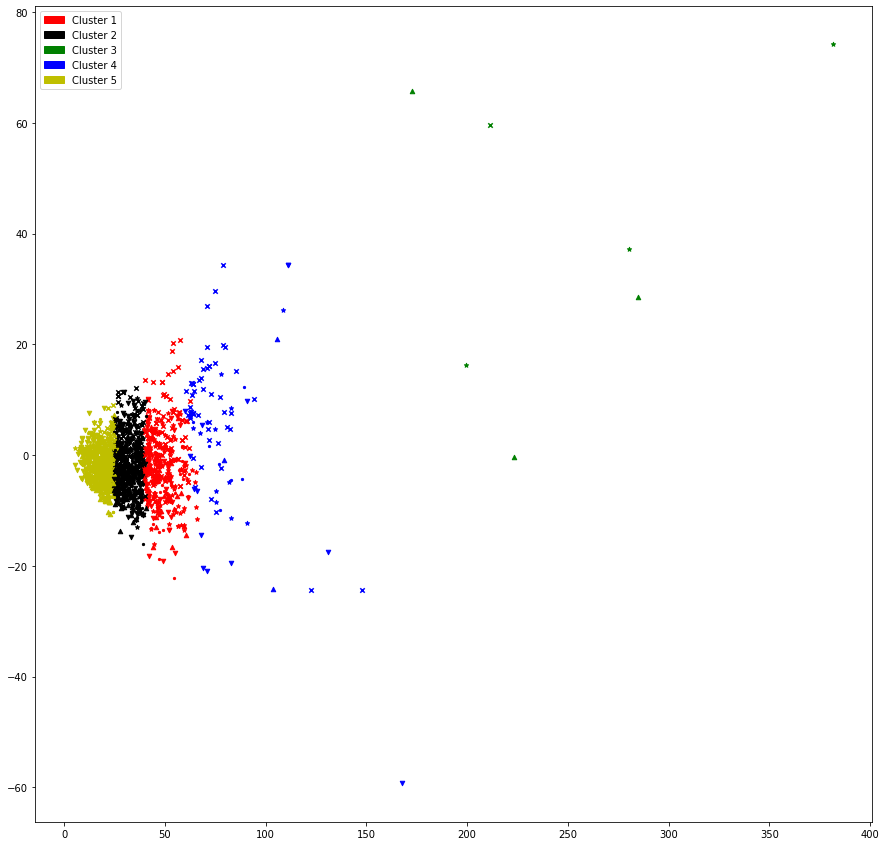

In [24]:
#We use TruncatedSVD and we do the same as before.
svd = TruncatedSVD()
res = svd.fit_transform(dataset)
x = res[:, 0]
y = res[:, 1]
    
#Exactly the same as before.
colors = {0:'r', 1:'k', 2:'g', 3:'b', 4:'y'}
markers = {0:'.', 1:'^', 2:'*', 3:'v', 4:'x'}

plt.figure(figsize=(15,15))
for i in range(y_train.shape[0]):
    plt.scatter(x[i], y[i], c=colors[y_kmeans[i]], marker=markers[y_train[i]], s=20)    

clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
leg = [mpatches.Patch(color=colors[i], label=clusters[i]) for i in range(5)]
plt.legend(handles=leg)

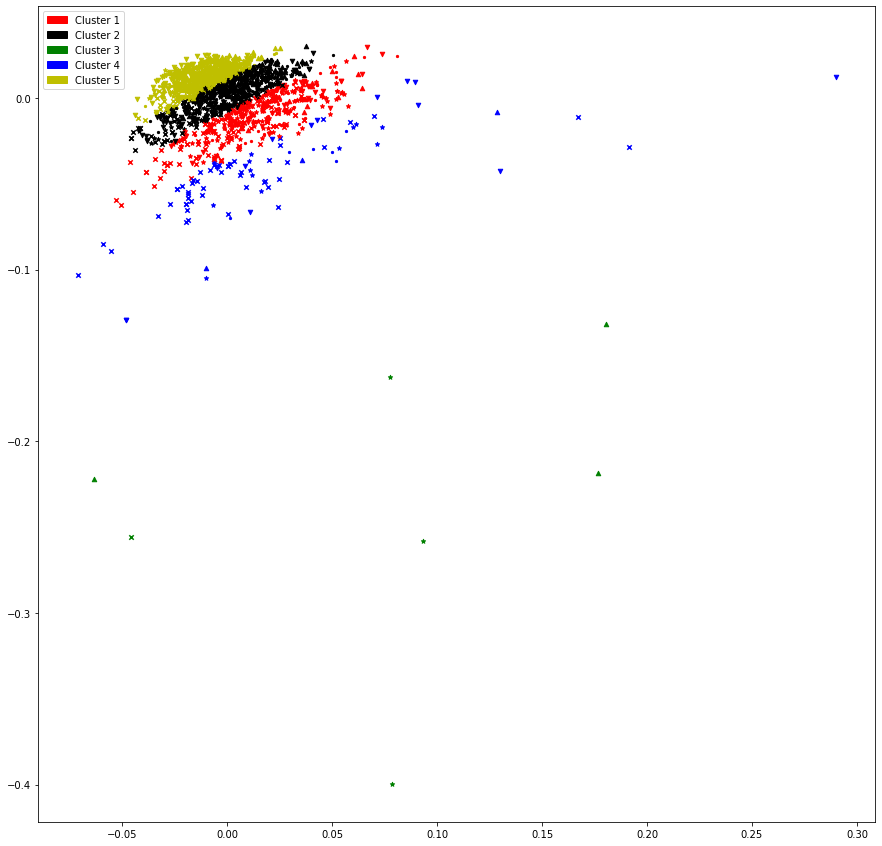

In [25]:
#We use FastICA with 2 components and we do the same as before.
ica = FastICA(n_components=2)
res = ica.fit_transform(dataset)
x = res[:, 0]
y = res[:, 1]
    
#Same as before
colors = {0:'r', 1:'k', 2:'g', 3:'b', 4:'y'}
markers = {0:'.', 1:'^', 2:'*', 3:'v', 4:'x'}

plt.figure(figsize=(15,15))
for i in range(y_train.shape[0]):
    plt.scatter(x[i], y[i], c=colors[y_kmeans[i]], marker=markers[y_train[i]], s=20)    

clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
leg = [mpatches.Patch(color=colors[i], label=clusters[i]) for i in range(5)]
plt.legend(handles=leg)

# TF-IDF

In [26]:
#Same as Bow, but now we use X_trainT, which is the data in TFIDF.
dataset = X_trainT.toarray()
kmeans = KMeans(n_clusters=5)
kmeans.euclidean_distances = distance
kmeans.fit(dataset)
y_kmeans = kmeans.predict(dataset)

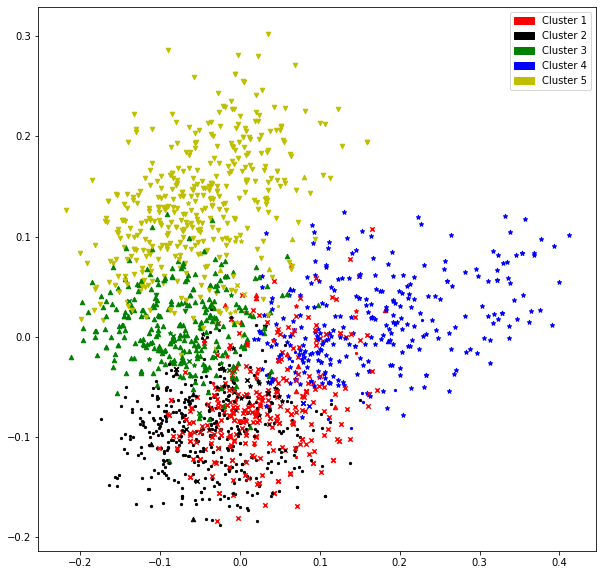

In [27]:
#Same as before with PCA.
pca = PCA(n_components=2)
res = pca.fit_transform(dataset)
x = res[:, 0]
y = res[:, 1]

#Same as before
colors = {0:'r', 1:'k', 2:'g', 3:'b', 4:'y'}
markers = {0:'.', 1:'^', 2:'*', 3:'v', 4:'x'}

plt.figure(figsize=(10,10))
for i in range(y_train.shape[0]):
    plt.scatter(x[i], y[i], c=colors[y_kmeans[i]], marker=markers[y_train[i]], s=20)    

clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
leg = [mpatches.Patch(color=colors[i], label=clusters[i]) for i in range(5)]
plt.legend(handles=leg)

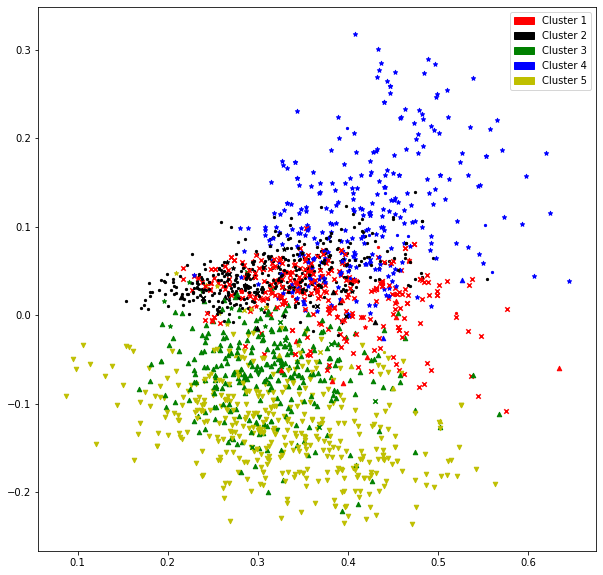

In [28]:
#Same as before with TruncatedSVD.
svd = TruncatedSVD()
res = svd.fit_transform(dataset)

x = res[:, 0]
y = res[:, 1]

#Same as before
colors = {0:'r', 1:'k', 2:'g', 3:'b', 4:'y'}
markers = {0:'.', 1:'^', 2:'*', 3:'v', 4:'x'}

plt.figure(figsize=(10,10))
for i in range(y_train.shape[0]):
    plt.scatter(x[i], y[i], c=colors[y_kmeans[i]], marker=markers[y_train[i]], s=20)    

clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
leg = [mpatches.Patch(color=colors[i], label=clusters[i]) for i in range(5)]
plt.legend(handles=leg)

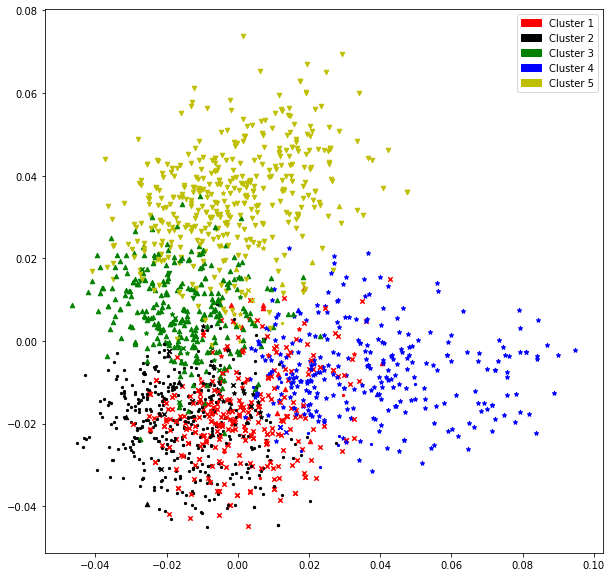

In [29]:
#Same as before with FastICA.
ica = FastICA(n_components=2)
res = ica.fit_transform(dataset)

x = res[:, 0]
y = res[:, 1]
    
#Same as before
colors = {0:'r', 1:'k', 2:'g', 3:'b', 4:'y'}
markers = {0:'.', 1:'^', 2:'*', 3:'v', 4:'x'}

plt.figure(figsize=(10,10))
for i in range(y_train.shape[0]):
    plt.scatter(x[i], y[i], c=colors[y_kmeans[i]], marker=markers[y_train[i]], s=20)    

clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
leg = [mpatches.Patch(color=colors[i], label=clusters[i]) for i in range(5)]
plt.legend(handles=leg)

# Word2Vec

In [30]:
#We use word_tokenize to "Content" and then Word2Vec to the result. We create the dataset with model.
tok = X_train_text.apply(lambda row: nltk.word_tokenize(row['Content']), axis=1)
model = Word2Vec(tok, min_count=1)
dataset = model[model.wv.vocab]

F:\H.D\ana\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [31]:
kmeans = KMeans(n_clusters=5)
kmeans.euclidean_distances = distance
kmeans.fit(dataset)
y_kmeans = kmeans.predict(dataset)

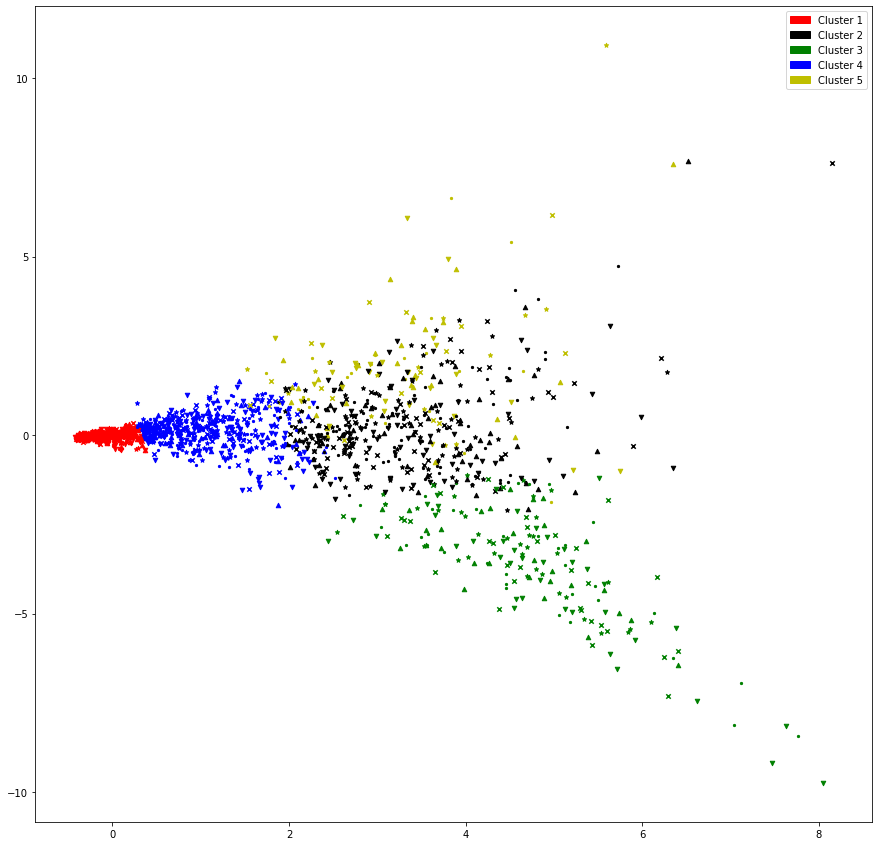

In [32]:
#Same as before with PCA.
pca = PCA(n_components=2)
res = pca.fit_transform(dataset)

x = res[:, 0]
y = res[:, 1]

#Same as before
colors = {0:'r', 1:'k', 2:'g', 3:'b', 4:'y'}
markers = {0:'.', 1:'^', 2:'*', 3:'v', 4:'x'}

plt.figure(figsize=(15,15))
for i in range(y_train.shape[0]):
    plt.scatter(x[i], y[i], c=colors[y_kmeans[i]], marker=markers[y_train[i]], s=20)    

clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
leg = [mpatches.Patch(color=colors[i], label=clusters[i]) for i in range(5)]
plt.legend(handles=leg)

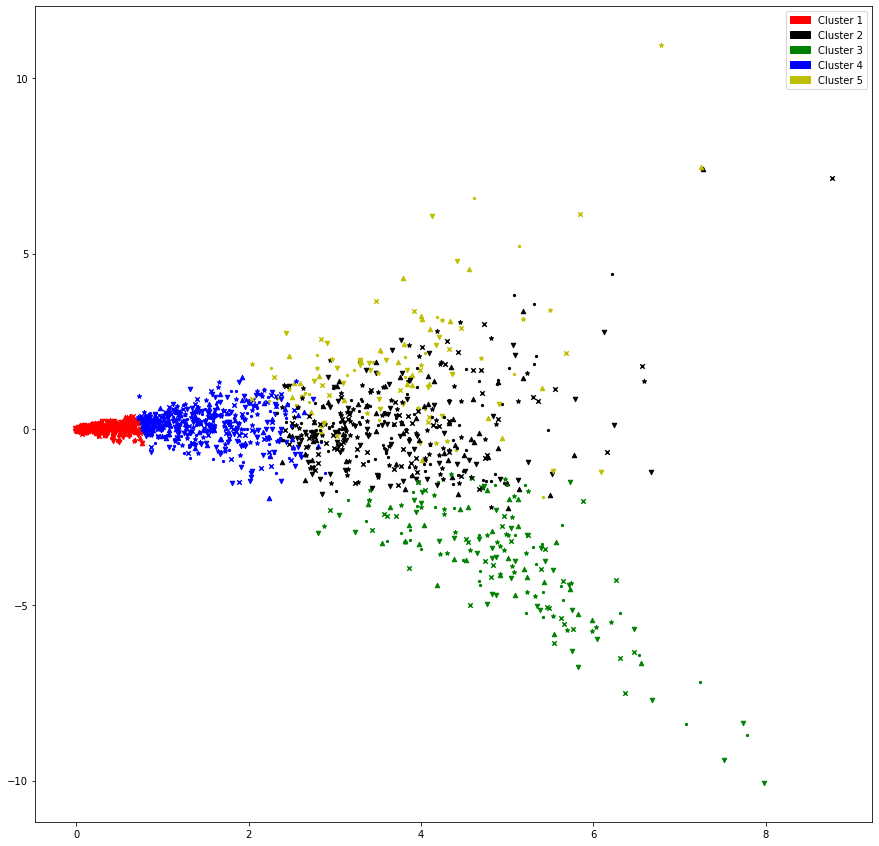

In [33]:
#Same as before with TruncatedSVD.
svd = TruncatedSVD()
res = svd.fit_transform(dataset)

x = res[:, 0]
y = res[:, 1]

#Same as before
colors = {0:'r', 1:'k', 2:'g', 3:'b', 4:'y'}
markers = {0:'.', 1:'^', 2:'*', 3:'v', 4:'x'}

plt.figure(figsize=(15,15))
for i in range(y_train.shape[0]):
    plt.scatter(x[i], y[i], c=colors[y_kmeans[i]], marker=markers[y_train[i]], s=20)    

clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
leg = [mpatches.Patch(color=colors[i], label=clusters[i]) for i in range(5)]
plt.legend(handles=leg)

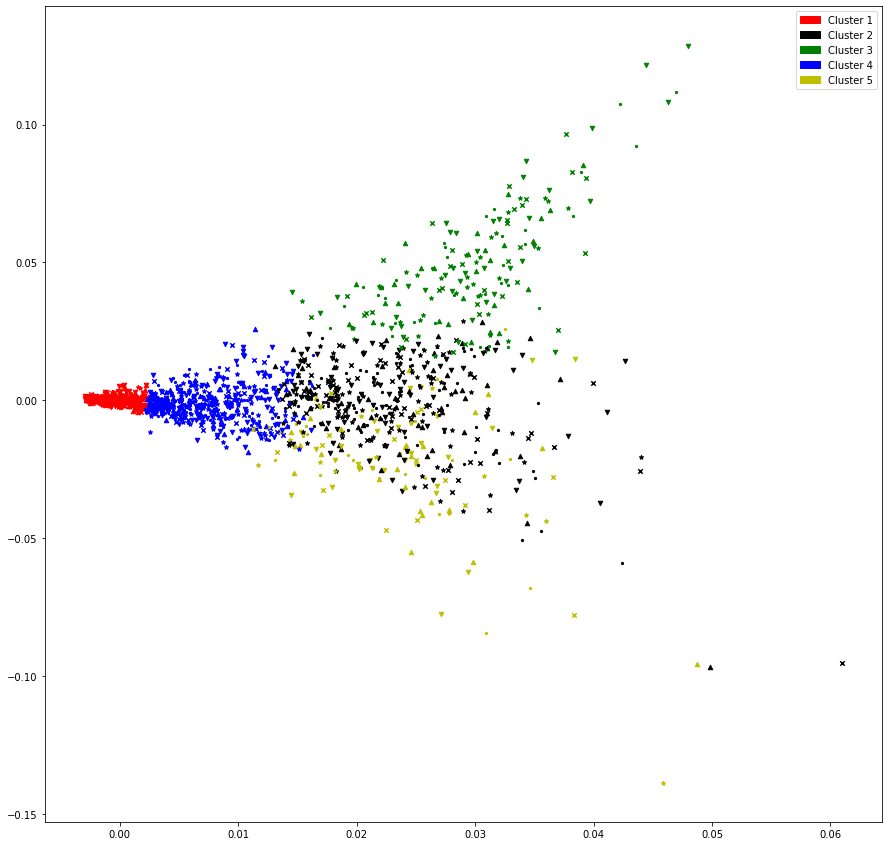

In [34]:
#Same as before with FastICA.
ica = FastICA(n_components=2)
res = ica.fit_transform(dataset)

x = res[:, 0]
y = res[:, 1]
    

#Same as before
colors = {0:'r', 1:'k', 2:'g', 3:'b', 4:'y'}
markers = {0:'.', 1:'^', 2:'*', 3:'v', 4:'x'}

plt.figure(figsize=(15,15))
for i in range(y_train.shape[0]):
    plt.scatter(x[i], y[i], c=colors[y_kmeans[i]], marker=markers[y_train[i]], s=20)    

clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
leg = [mpatches.Patch(color=colors[i], label=clusters[i]) for i in range(5)]
plt.legend(handles=leg)